<a href="https://colab.research.google.com/github/maitri-16/maitri-16/blob/main/retail_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import pandas as pd

In [2]:
data=pd.read_csv("/content/superstore.csv")
data.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


In [3]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   记录数             51290 non-null  int64  
 8   Order.Date      51290 non-null  object 
 9   Order.ID        51290 non-null  object 
 10  Order.Priority  51290 non-null  object 
 11  Product.ID      51290 non-null  object 
 12  Product.Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Region          51290 non-null  object 
 16  Row.ID          51290 non-null  int64  
 17  Sales           51290 non-null 

,0
Category,0
City,0
Country,0
Customer.ID,0
Customer.Name,0
Discount,0
Market,0
记录数,0
Order.Date,0
Order.ID,0


In [4]:
# convert date columns to datetime format
data['Order.Date'] = pd.to_datetime(data['Order.Date'])
data['Ship.Date'] = pd.to_datetime(data['Ship.Date'])

print(data['Order.Date'].head())
print(data['Ship.Date'].head())

0   2011-01-07
1   2011-01-21
2   2011-08-05
3   2011-08-05
4   2011-09-29
Name: Order.Date, dtype: datetime64[ns]
0   2011-01-09
1   2011-01-26
2   2011-08-09
3   2011-08-09
4   2011-10-03
Name: Ship.Date, dtype: datetime64[ns]


In [5]:
# Drop columns that are not neccesary for the analysis
data = data.drop(['Row.ID', '记录数', 'Market2'], axis=1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Category        51290 non-null  object        
 1   City            51290 non-null  object        
 2   Country         51290 non-null  object        
 3   Customer.ID     51290 non-null  object        
 4   Customer.Name   51290 non-null  object        
 5   Discount        51290 non-null  float64       
 6   Market          51290 non-null  object        
 7   Order.Date      51290 non-null  datetime64[ns]
 8   Order.ID        51290 non-null  object        
 9   Order.Priority  51290 non-null  object        
 10  Product.ID      51290 non-null  object        
 11  Product.Name    51290 non-null  object        
 12  Profit          51290 non-null  float64       
 13  Quantity        51290 non-null  int64         
 14  Region          51290 non-null  object        
 15  Sa

In [7]:
# check for any inconsistencies as the discounts should be between 0 and 1
print(data['Discount'].unique())

[0.    0.15  0.1   0.35  0.6   0.65  0.7   0.5   0.3   0.2   0.4   0.8
 0.85  0.45  0.27  0.17  0.37  0.47  0.25  0.57  0.55  0.07  0.002 0.602
 0.202 0.402 0.32 ]


In [8]:
print(data[data['Sales'] < 0])
print(data[data['Profit'] < 0])

Empty DataFrame
Columns: [Category, City, Country, Customer.ID, Customer.Name, Discount, Market, Order.Date, Order.ID, Order.Priority, Product.ID, Product.Name, Profit, Quantity, Region, Sales, Segment, Ship.Date, Ship.Mode, Shipping.Cost, State, Sub.Category, Year, weeknum]
Index: []

[0 rows x 24 columns]
         Category                 City        Country Customer.ID  \
29009  Technology                Paris         France   RC-198252   
29012  Technology              Taverny         France   TB-211752   
29018  Technology   Tremblay-en-France         France   DH-130752   
29021  Technology           Guyancourt         France   MH-174552   
29024  Technology  Le Plessis-Robinson         France   AA-104802   
...           ...                  ...            ...         ...   
51156  Technology          Los Angeles  United States   LH-171554   
51163  Technology          Los Angeles  United States   SC-202304   
51164  Technology          Los Angeles  United States   SC-202304   
5

In [9]:
data=data.drop_duplicates()
print(f"Rows after removing duplicates: {len(data)}")

Rows after removing duplicates: 51290


In [10]:
print(data.isnull().sum())

Category          0
City              0
Country           0
Customer.ID       0
Customer.Name     0
Discount          0
Market            0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Sales             0
Segment           0
Ship.Date         0
Ship.Mode         0
Shipping.Cost     0
State             0
Sub.Category      0
Year              0
weeknum           0
dtype: int64


In [11]:
print(data.head())

          Category         City        Country Customer.ID     Customer.Name  \
0  Office Supplies  Los Angeles  United States   LS-172304  Lycoris Saunders   
1  Office Supplies  Los Angeles  United States   MV-174854     Mark Van Huff   
2  Office Supplies  Los Angeles  United States   CS-121304      Chad Sievert   
3  Office Supplies  Los Angeles  United States   CS-121304      Chad Sievert   
4  Office Supplies  Los Angeles  United States   AP-109154    Arthur Prichep   

   Discount Market Order.Date        Order.ID Order.Priority  ... Region  \
0       0.0     US 2011-01-07  CA-2011-130813           High  ...   West   
1       0.0     US 2011-01-21  CA-2011-148614         Medium  ...   West   
2       0.0     US 2011-08-05  CA-2011-118962         Medium  ...   West   
3       0.0     US 2011-08-05  CA-2011-118962         Medium  ...   West   
4       0.0     US 2011-09-29  CA-2011-146969           High  ...   West   

  Sales   Segment  Ship.Date       Ship.Mode  Shipping.Cost   

# **EDA**

Time based sales trend

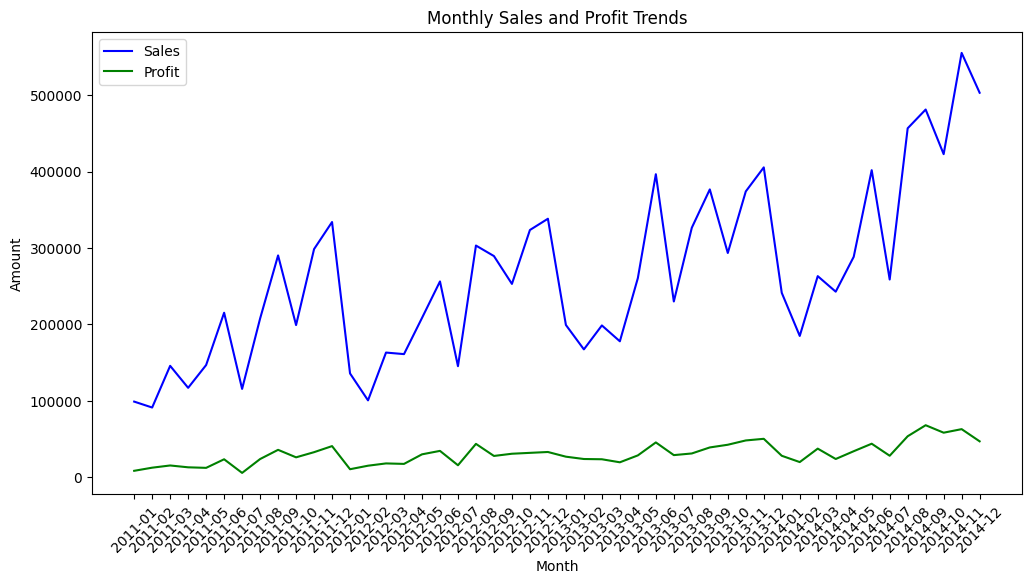

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

data['Order.Month'] = data['Order.Date'].dt.to_period('M')
monthly_sales = data.groupby('Order.Month').agg({'Sales':'sum','Profit':'sum'}).reset_index()
monthly_sales['Order.Month'] = monthly_sales['Order.Month'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Order.Month', y='Sales', label='Sales',color ='blue')
sns.lineplot(data=monthly_sales, x='Order.Month', y='Profit', label='Profit', color = 'green')
plt.title('Monthly Sales and Profit Trends')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [14]:
print("Month with highest sales:", monthly_sales.loc[monthly_sales['Sales'].idxmax()])
print("Month with lowest profit:", monthly_sales.loc[monthly_sales['Profit'].idxmin()])

Month with highest sales: Order.Month       2014-11
Sales              555312
Profit         62856.5879
Name: 46, dtype: object
Month with lowest profit: Order.Month       2011-07
Sales              115518
Profit         5585.00352
Name: 6, dtype: object


regional analysis

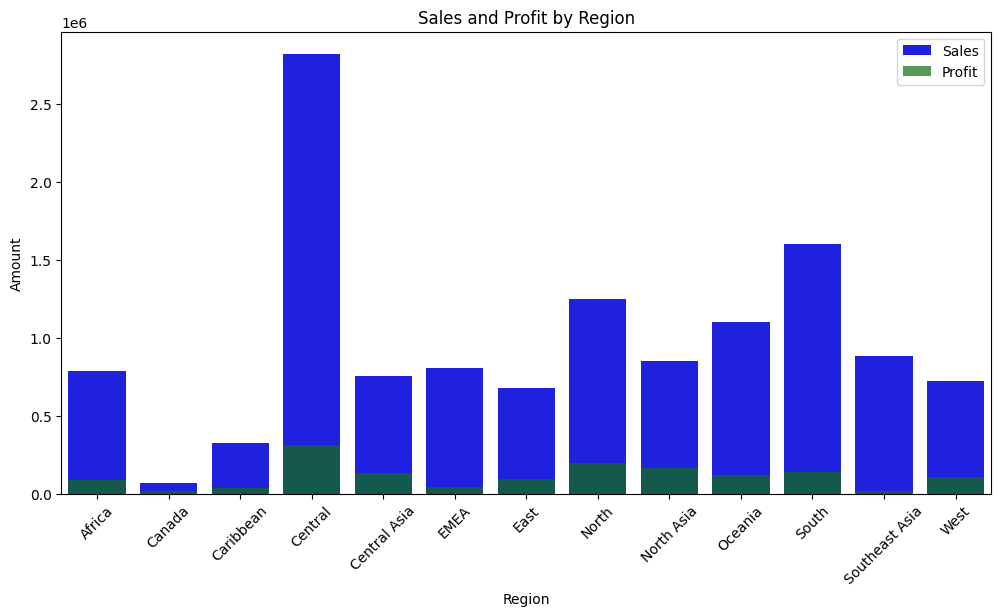

In [15]:
regional_sales = data.groupby('Region').agg({'Sales': 'sum', 'Profit':'sum'}).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=regional_sales, x='Region', y='Sales', label='Sales',color ='blue')
sns.barplot(data=regional_sales, x='Region',y='Profit',label='Profit',color='green',alpha=0.7)
plt.title('Sales and Profit by Region')
plt.xlabel('Region')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [16]:
print("Region with highest sales:", regional_sales.loc[regional_sales['Sales'].idxmax()])
print("Region with lowest sales:", regional_sales.loc[regional_sales['Sales'].idxmin()])

print("Region with highest profit:", regional_sales.loc[regional_sales['Profit'].idxmax()])
print("Region with lowest profit:", regional_sales.loc[regional_sales['Profit'].idxmin()])

Region with highest sales: Region         Central
Sales          2822399
Profit    311403.98164
Name: 3, dtype: object
Region with lowest sales: Region      Canada
Sales        66932
Profit    17817.39
Name: 1, dtype: object
Region with highest profit: Region         Central
Sales          2822399
Profit    311403.98164
Name: 3, dtype: object
Region with lowest profit: Region      Canada
Sales        66932
Profit    17817.39
Name: 1, dtype: object


product level analysis

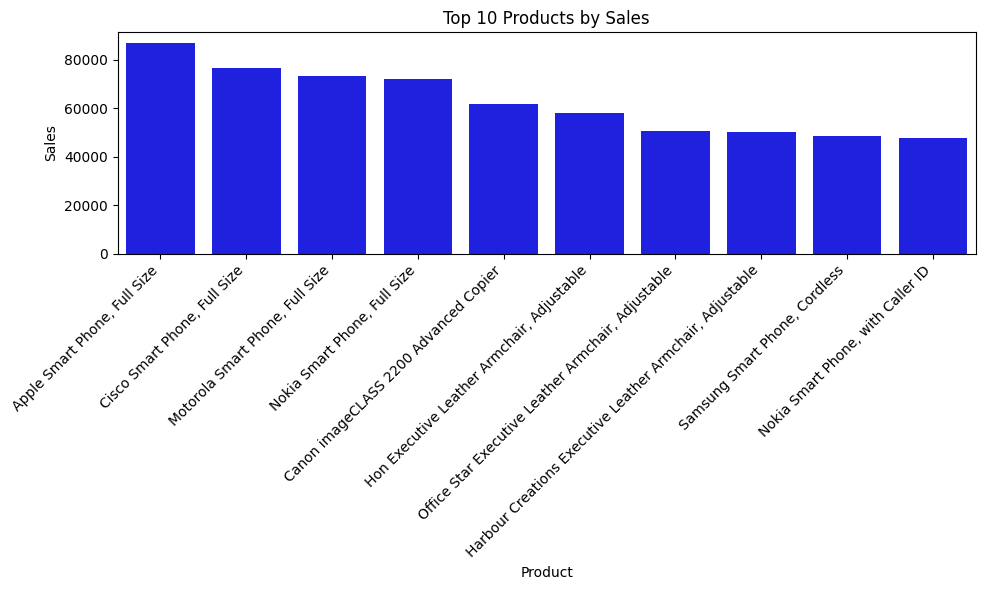

In [19]:
product_sales = data.groupby('Product.Name').agg({'Sales': 'sum', 'Profit':'sum'}).reset_index()
top_10_products = product_sales.sort_values(by='Sales',ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_10_products,x='Product.Name',y='Sales',color= 'blue')
plt.title('Top 10 Products by Sales')
plt.xlabel('Product')
plt.ylabel('Sales')
plt.xticks(rotation=45 , ha='right')
plt.tight_layout()
plt.show()

In [20]:
print("Product with highest sales:", product_sales.loc[product_sales['Sales'].idxmax()])
print("Product with lowest sales:", product_sales.loc[product_sales['Sales'].idxmin()])

Product with highest sales: Product.Name    Apple Smart Phone, Full Size
Sales                                  86936
Profit                             5921.5786
Name: 310, dtype: object
Product with lowest sales: Product.Name    Eureka Disposable Bags for Sanitaire Vibra Gro...
Sales                                                           2
Profit                                                     -4.466
Name: 1368, dtype: object
